In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Kala_game = pd.read_csv("Game 6-7.xlsx - Kalamazoo.csv")

In [6]:
Kala_game

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Kalamazoo,E,6.0,game,game,0.5703,38.0893,4,114.4695,0,...,0,32,17,4,1,0,33,10,3,3
1,Kalamazoo,Q,82.0,game,game,5.8848,62.1881,31,1243.2514,0,...,0,275,152,32,2,0,234,133,61,19
2,Kalamazoo,A,0.0,game,game,0.2366,0.0000,0,36.2596,0,...,0,3,0,0,0,0,1,2,0,0
3,Kalamazoo,O,50.0,game,game,3.8032,508.0004,34,566.1872,0,...,0,135,122,37,14,0,143,101,40,21
4,Kalamazoo,I,32.0,game,game,2.3955,270.0703,26,353.2861,0,...,0,104,64,18,6,0,97,49,27,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Kalamazoo,Reiser,NaN,1st.half,game,3.0585,214.7347,25,569.2083,1,...,0,140,68,17,5,0,124,78,31,9
76,Kalamazoo,Chiero,NaN,1st.half,game,1.9181,137.1114,12,313.7134,0,...,0,97,37,10,6,0,86,38,22,7
77,Kalamazoo,Harding,NaN,1st.half,game,2.9204,101.1239,16,525.3613,1,...,0,170,90,21,6,0,168,78,32,6
78,Kalamazoo,Dalimonte,NaN,1st.half,game,2.7760,99.1008,27,507.6965,1,...,0,138,68,22,2,0,132,59,23,9


In [7]:
Kala_full = Kala_game[Kala_game['Split Name']== 'game']
Kala_full

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,Kalamazoo,E,6.0,game,game,0.5703,38.0893,4,114.4695,0,...,0,32,17,4,1,0,33,10,3,3
1,Kalamazoo,Q,82.0,game,game,5.8848,62.1881,31,1243.2514,0,...,0,275,152,32,2,0,234,133,61,19
2,Kalamazoo,A,0.0,game,game,0.2366,0.0000,0,36.2596,0,...,0,3,0,0,0,0,1,2,0,0
3,Kalamazoo,O,50.0,game,game,3.8032,508.0004,34,566.1872,0,...,0,135,122,37,14,0,143,101,40,21
4,Kalamazoo,I,32.0,game,game,2.3955,270.0703,26,353.2861,0,...,0,104,64,18,6,0,97,49,27,8
5,Kalamazoo,R,8.0,game,game,0.7075,168.0813,9,123.3314,0,...,0,31,13,2,2,0,26,9,9,4
6,Kalamazoo,N,6.0,game,game,0.7089,55.6866,9,144.9703,0,...,0,23,15,3,3,0,24,13,7,1
7,Kalamazoo,X,0.0,game,game,0.1563,0.0000,0,26.8301,0,...,0,0,0,0,0,0,0,0,0,0
8,Kalamazoo,G,31.0,game,game,2.3414,183.9146,25,392.5310,0,...,0,92,61,12,5,0,91,40,21,10
9,Kalamazoo,C,90.0,game,game,6.9106,136.9834,36,1217.9314,1,...,0,381,171,50,9,0,359,158,52,18


In [8]:
Kala_volume_intensity = Kala_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [9]:
Kala_cluster = Kala_volume_intensity.loc[:, Kala_volume_intensity.columns != 'Player Name']

In [10]:
Kala_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Kala_cluster)
    Kala_distortions.append(kmeanModel.inertia_)

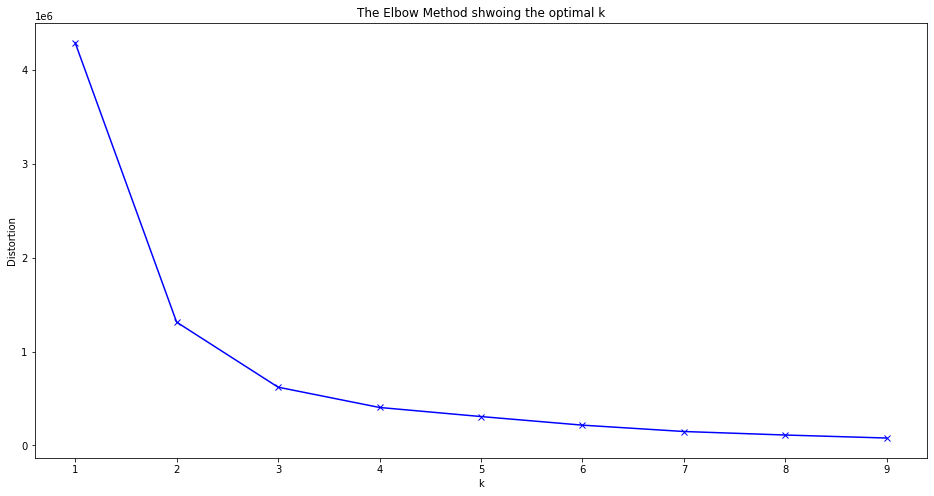

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, Kala_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [12]:
x_Kala = Kala_cluster.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x_Kala)
X_norm = pd.DataFrame(x_scaled)

In [13]:
pca_Kala = PCA(n_components = 2) # 2D PCA for the plot
reduced_Kala = pd.DataFrame(pca_Kala.fit_transform(X_norm))

In [15]:
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced_Kala)
# get the cluster labels
labels = kmeans.predict(reduced_Kala)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
Kala_names = Kala_full['Player Name']

In [17]:
reduced_Kala['cluster'] = clusters
reduced_Kala['names'] = Kala_names
reduced_Kala.columns = ['x', 'y', 'cluster', 'names']
reduced_Kala.head()

,x,y,cluster,names
0,1.188028,-0.045659,2,E
1,-0.908900,-0.330962,0,Q
2,1.347071,-0.164435,2,A
3,-0.240862,0.580727,1,O
4,0.356757,0.337477,1,I


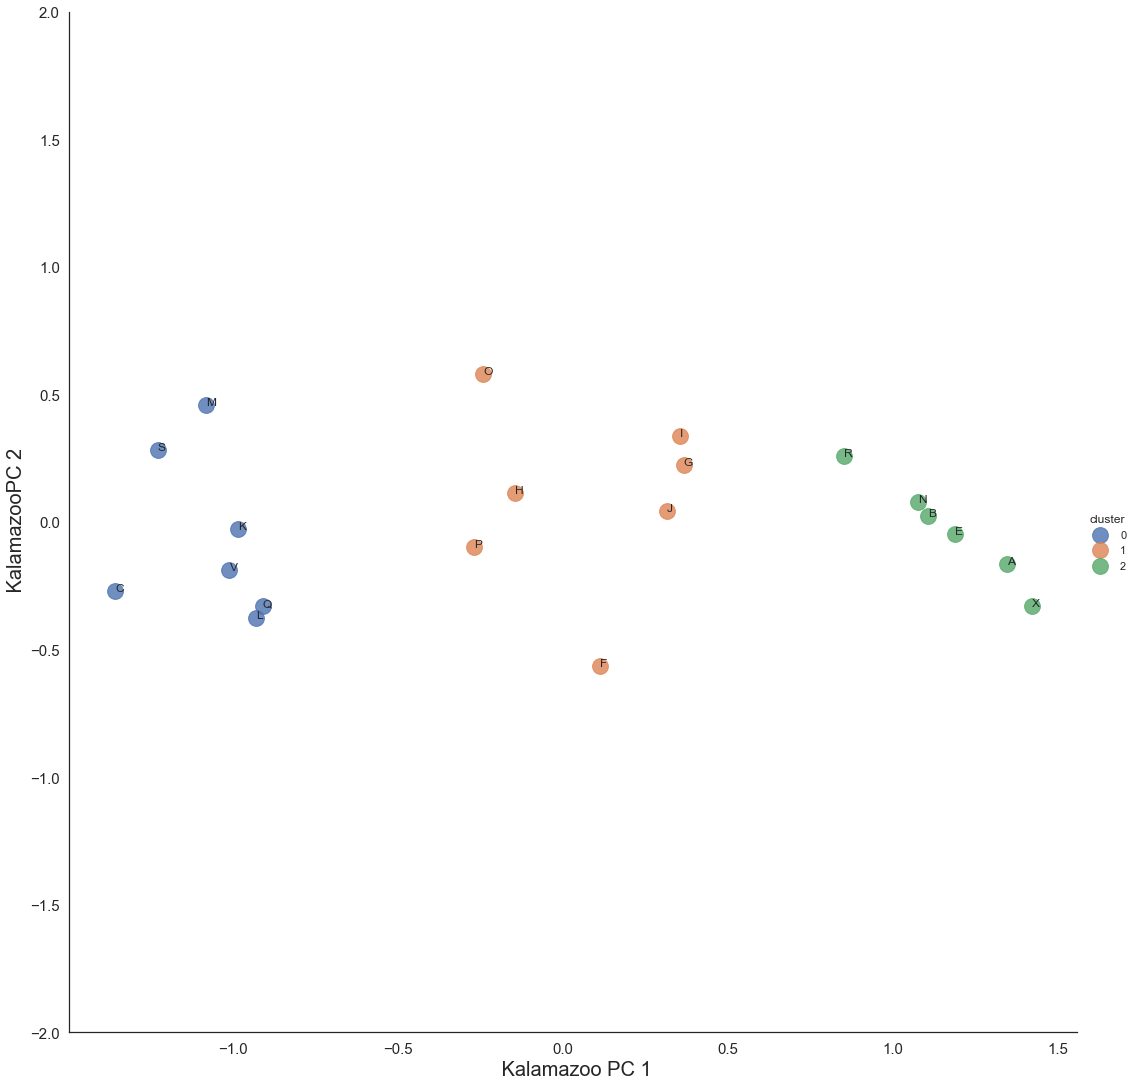

In [18]:
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced_Kala, legend= True,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced_Kala.x, reduced_Kala.y, reduced_Kala.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel(" Kalamazoo PC 1", fontsize = 20)
plt.ylabel(" KalamazooPC 2", fontsize = 20)
plt.show()

In [21]:
Kala_group_0 = reduced_Kala[(reduced_Kala['cluster'] == 0)]
Kala_group_0
# Positions: Q(MF) C(MF) M(D) S(MF) V(MF) K(D) L(D)

,x,y,cluster,names
1,-0.908900,-0.330962,0,Q
9,-1.356233,-0.271974,0,C
12,-1.080330,0.457386,0,M
15,-1.226549,0.282670,0,S
17,-1.009745,-0.188379,0,V
18,-0.983452,-0.026689,0,K
19,-0.928276,-0.375567,0,L


In [20]:
Kala_group_1 = reduced_Kala[(reduced_Kala['cluster'] == 1)]
Kala_group_1
# Positions: O(F) I(F) G(F) F(GK) P(F) J(F) H(F)

,x,y,cluster,names
3,-0.240862,0.580727,1,O
4,0.356757,0.337477,1,I
8,0.366488,0.222249,1,G
11,0.112996,-0.565100,1,F
13,-0.267229,-0.096688,1,P
14,0.315011,0.044478,1,J
16,-0.144455,0.111994,1,H


In [19]:
Kala_group_2 = reduced_Kala[(reduced_Kala['cluster'] == 2)]
Kala_group_2
# Positions: E(MF) A(D) R(D) N(F) X(GK) B(F)

,x,y,cluster,names
0,1.188028,-0.045659,2,E
2,1.347071,-0.164435,2,A
5,0.853640,0.256986,2,R
6,1.077486,0.079887,2,N
7,1.421257,-0.331017,2,X
10,1.107298,0.022616,2,B
